# Problem Statement
The dataset contains demographic and behavioral information of credit card customers, including their credit limits, number of credit cards, bank visits, online visits, and calls made. The objective is to analyze customer behavior and segment them into meaningful groups to support customer relationship management and targeted marketing strategies.

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data = pd.read_csv("Credit_Card_Customer_Data.csv")
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


# Domain Analysis
* This dataset belongs to the Banking and Financial Services domain, specifically focusing on Credit Card Customer Analytics.
* Banks and financial institutions collect such data to understand customer behavior, credit usage patterns, and service interaction (via bank visits, online platforms, or calls).
* The dataset provides insights into:
  - Credit Utilization: Credit limits and number of cards reflect financial capacity and risk exposure.
  - Customer Engagement: Visits to bank branches, online portals, and customer service calls highlight interaction preferences.
  - Segmentation Potential: The features enable clustering customers into groups (e.g., high spenders, digital adopters, branch-dependent customers), which is vital for personalized marketing, risk management, and improving customer experience.

# Basic Checks

In [3]:
# 1) print first 5 rows
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# 2) print last 5 rows
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [5]:
# 3) shape
data.shape

(660, 7)

In [6]:
# 4) print all the columns
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
# 5) Check datatypes of each column
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [8]:
# 6) Check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
# 7) statistical analysis
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


Insights:-
* Customer Engagement: Most customers interact with the bank modestly (2–4 visits/calls), but there are outliers (heavy digital or frequent callers).

* Credit Segmentation: Big gap between typical customers (10k–48k credit limit) and premium customers (100k–200k).

* Behavioral Diversity: Different customers prefer different channels (branch vs online vs calls), which is useful for customer segmentation.

* Customer keys are unique identifiers, so not relevant for modeling.

In [10]:
# 8) Check for missing values
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

# Exploratory Data Analysis
 ### a) Univariate Analysis- 

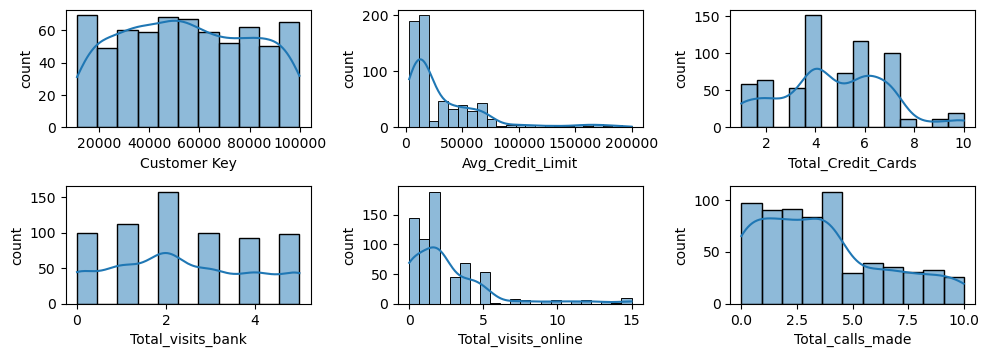

In [11]:
# Check for distribution of data

plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1

for column in data.drop('Sl_No', axis=1):
    if plotnumber <= 6:
        ax = plt.subplot(3,3, plotnumber)
        sns.histplot(x=data[column], kde=True)

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

All features are skewed

### b) Bivariate Analysis-

In [12]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

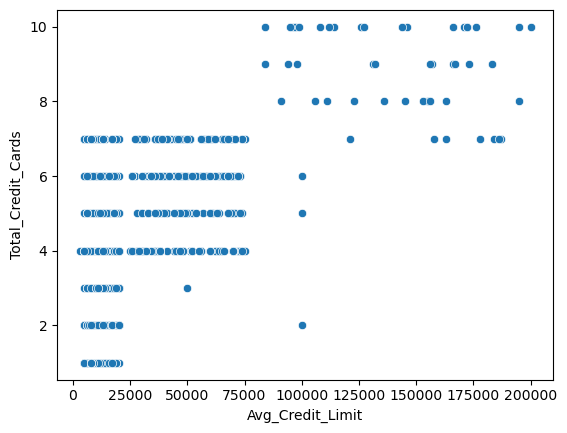

In [13]:
sns.scatterplot(data=data, x='Avg_Credit_Limit', y='Total_Credit_Cards')
plt.show()

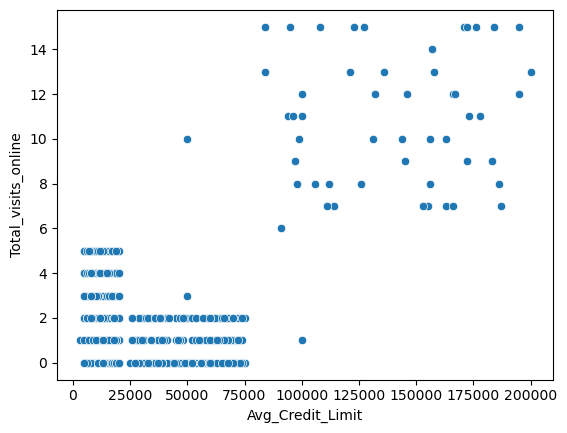

In [14]:
sns.scatterplot(data=data, x='Avg_Credit_Limit', y='Total_visits_online')
plt.show()

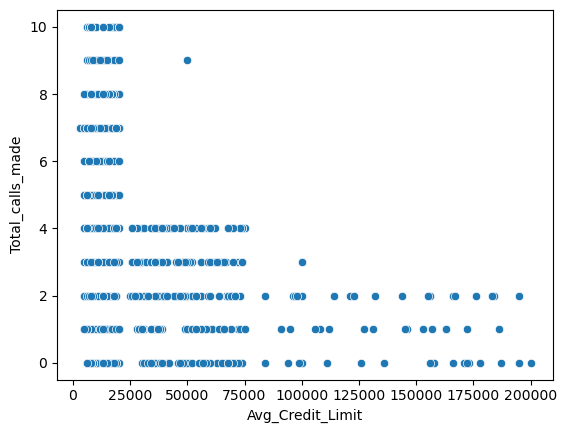

In [15]:
sns.scatterplot(data=data, x='Avg_Credit_Limit', y='Total_calls_made')
plt.show()

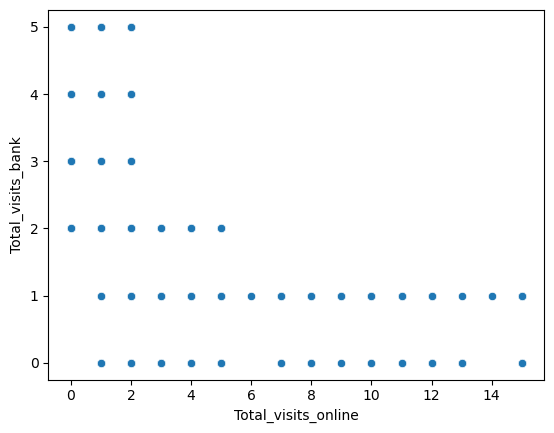

In [16]:
sns.scatterplot(data=data, x='Total_visits_online', y='Total_visits_bank')
plt.show()

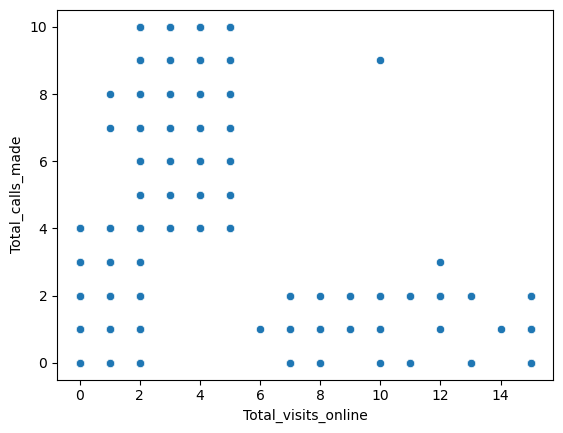

In [17]:
sns.scatterplot(data=data, x='Total_visits_online', y='Total_calls_made')
plt.show()

### c) Multivariate Analysis-

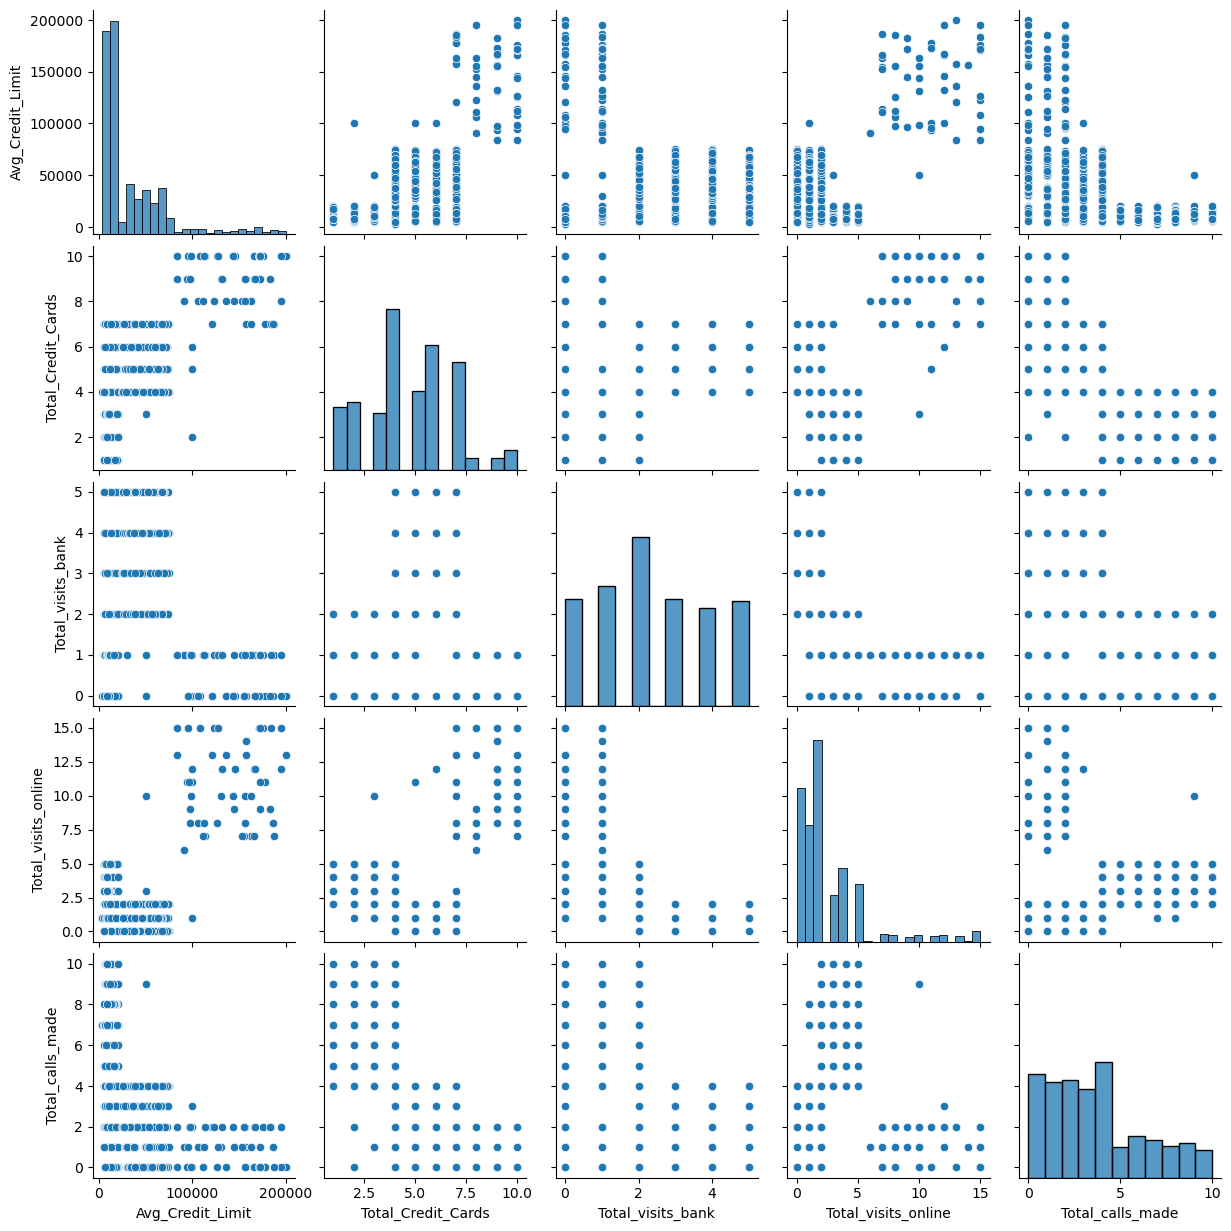

In [18]:
sns.pairplot(data.drop(['Sl_No', 'Customer Key'], axis=1))
plt.show()

# Data Preprocessing

In [19]:
# 1) check for missing values and handle them
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [20]:
# 2) check for duplicate values
data.duplicated().sum()

0

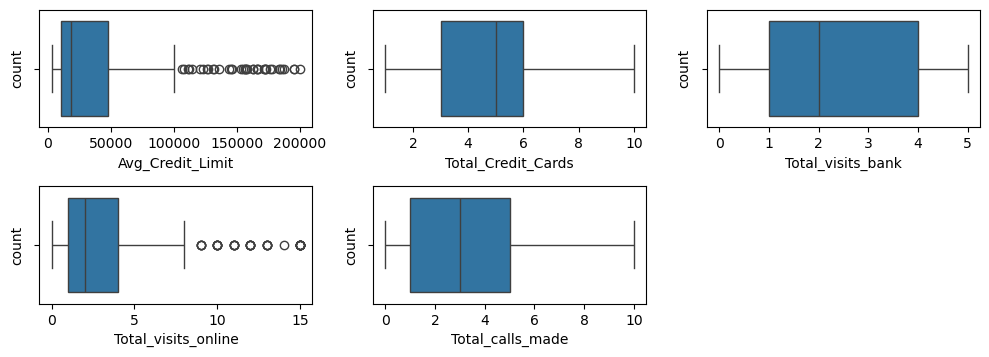

In [21]:
# 3) check for outliers
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1

for column in data.drop(['Sl_No', 'Customer Key'], axis=1):
    if plotnumber <= 5:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(x=data[column])

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [22]:
# (a) Handle Outliers in Avg_Credit_Limit 
# Find Q1, Q3 of Avg_Credit_Limit 

Q1 = data['Avg_Credit_Limit'].quantile(0.25) # 1/4th value
print("Lower Quartile: ", Q1)
Q3 = data['Avg_Credit_Limit'].quantile(0.75) # 3/4th value
print("Upper Quartile: ", Q3)

# Find IQR
IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
print("Lower Limit: ", lower_limit)
upper_limit = Q3+1.5*IQR
print("Upper Limit: ", upper_limit)

Lower Quartile:  10000.0
Upper Quartile:  48000.0
Lower Limit:  -47000.0
Upper Limit:  105000.0


In [23]:
# Find values above Upper Limit
data.loc[data['Avg_Credit_Limit'] > upper_limit]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,613,94391,157000,9,1,14,1
614,615,40019,163000,8,1,7,1
615,616,77910,131000,9,1,10,1
617,618,98216,136000,8,0,13,0
618,619,54495,121000,7,0,13,2
619,620,47650,158000,7,0,13,0
620,621,32107,108000,10,0,15,1
621,622,84192,166000,9,1,12,2
622,623,53916,176000,10,1,15,2
623,624,32584,166000,10,0,7,0


In [24]:
len(data.loc[data['Avg_Credit_Limit'] > upper_limit])/len(data)

0.05909090909090909

Greater than 5%, so keep the outliers.

In [25]:
# Find values below lower limit
data.loc[data['Avg_Credit_Limit'] < lower_limit]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [26]:
# (b) Handle Outliers in Total_visits_online 
# Find Q1, Q3 of Total_visits_online 

Q1 = data['Total_visits_online'].quantile(0.25) # 1/4th value
print("Lower Quartile: ", Q1)
Q3 = data['Total_visits_online'].quantile(0.75) # 3/4th value
print("Upper Quartile: ", Q3)

# Find IQR
IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
print("Lower Limit: ", lower_limit)
upper_limit = Q3+1.5*IQR
print("Upper Limit: ", upper_limit)

Lower Quartile:  1.0
Upper Quartile:  4.0
Lower Limit:  -3.5
Upper Limit:  8.5


In [27]:
# Find values above Upper Limit
data.loc[data['Total_visits_online'] > upper_limit]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,2,38414,50000,3,0,10,9
4,5,47437,100000,6,0,12,3
6,7,48370,100000,5,0,11,2
612,613,94391,157000,9,1,14,1
613,614,50598,94000,9,1,11,0
615,616,77910,131000,9,1,10,1
616,617,89832,96000,10,1,11,2
617,618,98216,136000,8,0,13,0
618,619,54495,121000,7,0,13,2
619,620,47650,158000,7,0,13,0


In [28]:
len(data.loc[data['Total_visits_online'] > upper_limit])/len(data)

0.05606060606060606

Slightly greater than 5%, So keep the ouliers

In [29]:
# Find values below lower limit
data.loc[data['Total_visits_online'] < lower_limit]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


# Feature Engineering/Selection

In [30]:
# 1) Drop irrelevant columns:-
data.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [31]:
# 2) Adding new features:-

### 1. Digital_Engagement_Ratio:-
Formula: Total_visits_online / (Total_visits_bank + 1)

Explanation:
This ratio is designed to measure a customer's preference for digital banking channels over traditional physical branch banking.

* Ratio = 0: The customer has no online visits. They are purely branch-dependent.

* Ratio < 1: The customer uses the branch more often than online banking. (e.g., 0.5 means they visit online half as often as they visit the branch).

* Ratio = 1: The customer uses online and branch services equally.

* Ratio > 1: The customer prefers online banking. (e.g., A ratio of 10 means they use online banking 10 times for every 1 branch visit).

* Ratio is very high (e.g., 100+): The customer is almost exclusively digital. This is common if Total_visits_bank is 0 or 1.

### 2. Call_to_Visit_Ratio:-
Formula: Total_calls_made / (Total_visits_bank + Total_visits_online + 1)

Explanation:
This ratio measures a customer's reliance on phone calls compared to all self-service channels (both online and in-branch). A high ratio suggests a customer who requires more personal assistance or has complex needs.

* Ratio = 0: The customer never calls. They exclusively use self-service channels.

* Ratio < 1: The customer uses self-service more than they call. (e.g., 0.2 means they make 1 call for every 5 self-service visits).

* Ratio > 1: The customer calls more often than they use self-service. This is a strong signal of a "high-maintenance" or "call-dependent" customer. (e.g., A ratio of 3 means they make 3 calls for every 1 self-service visit).

* Ratio is very high: The customer almost exclusively uses the phone, potentially indicating frustration with self-service options or a need for very high-touch service.

### 3. Credit_per_Card:-
Formula: Avg_Credit_Limit / Total_Credit_Cards

Explanation:
This feature calculates the average credit limit allocated to each of the customer's credit cards. It's a crucial metric for understanding customer value beyond the raw numbers.

* A high Credit_per_Card value indicates a premium, high-trust, high-value customer.

* A low Credit_per_Card value indicates a customer with more diluted credit, who might be less profitable or more focused on acquiring multiple cards than on spending.

In [32]:
data['Digital_Engagement_Ratio'] = data['Total_visits_online'] / (data['Total_visits_bank'] + 1)
data['Call_to_Visit_Ratio'] = data['Total_calls_made'] / (data['Total_visits_bank'] + data['Total_visits_online'] + 1)
data['Credit_per_Card'] = data['Avg_Credit_Limit'] / data['Total_Credit_Cards']
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Digital_Engagement_Ratio,Call_to_Visit_Ratio,Credit_per_Card
0,100000,2,1,1,0,0.5,0.000000,50000.000000
1,50000,3,0,10,9,10.0,0.818182,16666.666667
2,50000,7,1,3,4,1.5,0.800000,7142.857143
3,30000,5,1,1,4,0.5,1.333333,6000.000000
4,100000,6,0,12,3,12.0,0.230769,16666.666667


In [33]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Digital_Engagement_Ratio,Call_to_Visit_Ratio,Credit_per_Card
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333,1.477601,0.699826,7200.185185
std,37625.487804,2.167835,1.631813,2.935724,2.865317,2.378934,0.646591,5454.318394
min,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,714.285714
25%,10000.000000,3.000000,1.000000,1.000000,1.000000,0.191667,0.166667,3000.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000,0.500000,0.571429,5666.666667
75%,48000.000000,6.000000,4.000000,4.000000,5.000000,2.000000,1.000000,10000.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000,15.000000,4.000000,50000.000000


In [34]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Digital_Engagement_Ratio,Call_to_Visit_Ratio,Credit_per_Card
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352,0.524244,-0.395708,0.749242
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251,0.131798,-0.591011,0.058422
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016,-0.624923,-0.543640,-0.219341
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299,0.899919,-0.025985,0.399134
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000,0.132782,0.886980,-0.125080
Digital_Engagement_Ratio,0.524244,0.131798,-0.624923,0.899919,0.132782,1.000000,0.055310,0.402583
Call_to_Visit_Ratio,-0.395708,-0.591011,-0.543640,-0.025985,0.886980,0.055310,1.000000,-0.134741
Credit_per_Card,0.749242,0.058422,-0.219341,0.399134,-0.125080,0.402583,-0.134741,1.000000


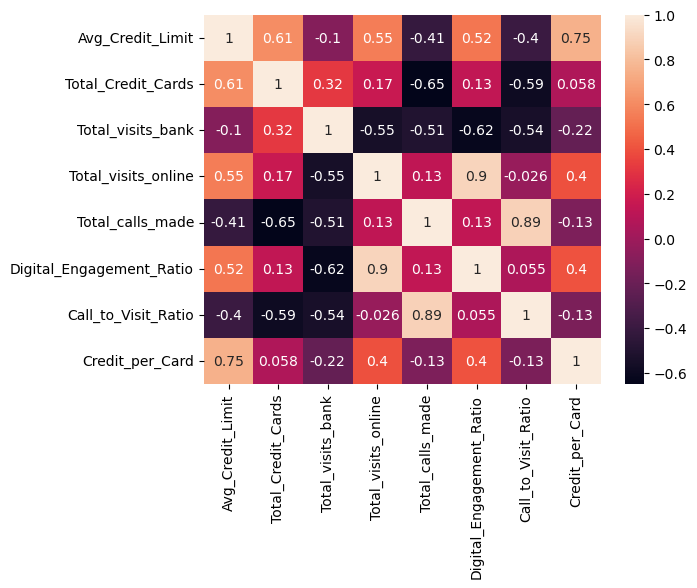

In [35]:
# 3) Check for multicolliniarity

sns.heatmap(data.corr(), annot=True)
plt.show()

### Major Redundancy & Multicollinearity:-
*  K-means performs poorly with highly correlated features as it distorts the distance calculations.
* Based on the correlation analysis, a subset of features can be used to avoid redundancy. Here are two strong options:

1) Option 1 (The "Engineered Features" Set)
* This set uses powerful new ratios and avoids all redundancy.
  - Credit_per_Card (Represents Customer Value)
  - Digital_Engagement_Ratio (Represents Channel Preference)
  - Call_to_Visit_Ratio (Represents Support Preference)
  - Total_Credit_Cards (It's not highly correlated with anything else here and adds unique info)

2) Option 2 (The "Hybrid" Set)
* A mix of original and engineered features.
  - Avg_Credit_Limit (Customer Value)
  - Total_Credit_Cards (Product Count)
  - Digital_Engagement_Ratio (Channel Preference)
  - Call_to_Visit_Ratio (Support Preference)

# Feature Scaling/Normalization

In [36]:
data.head(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Digital_Engagement_Ratio,Call_to_Visit_Ratio,Credit_per_Card
0,100000,2,1,1,0,0.5,0.000000,50000.000000
1,50000,3,0,10,9,10.0,0.818182,16666.666667
2,50000,7,1,3,4,1.5,0.800000,7142.857143
3,30000,5,1,1,4,0.5,1.333333,6000.000000
4,100000,6,0,12,3,12.0,0.230769,16666.666667


In [37]:
data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Digital_Engagement_Ratio',
       'Call_to_Visit_Ratio', 'Credit_per_Card'],
      dtype='object')

In [38]:
from sklearn.preprocessing import RobustScaler
scaling = RobustScaler()
dt = scaling.fit_transform(data)
dt

array([[ 2.15789474, -1.        , -0.33333333, ...,  0.        ,
        -0.68571429,  6.33333333],
       [ 0.84210526, -0.66666667, -0.66666667, ...,  5.25345622,
         0.2961039 ,  1.57142857],
       [ 0.84210526,  0.66666667, -0.33333333, ...,  0.55299539,
         0.27428571,  0.21088435],
       ...,
       [ 3.34210526,  1.        , -0.33333333, ...,  2.21198157,
        -0.57662338,  1.7797619 ],
       [ 4.05263158,  1.66666667, -0.33333333, ...,  3.87096774,
        -0.68571429,  1.64761905],
       [ 3.92105263,  1.33333333, -0.66666667, ...,  6.359447  ,
        -0.5010989 ,  1.84126984]])

convert this array into a dataframe

In [39]:
data_processed = pd.DataFrame(dt, 
columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Digital_Engagement_Ratio', 'Call_to_Visit_Ratio', 'Credit_per_Card'])

data_processed

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Digital_Engagement_Ratio,Call_to_Visit_Ratio,Credit_per_Card
0,2.157895,-1.000000,-0.333333,-0.333333,-0.75,0.000000,-0.685714,6.333333
1,0.842105,-0.666667,-0.666667,2.666667,1.50,5.253456,0.296104,1.571429
2,0.842105,0.666667,-0.333333,0.333333,0.25,0.552995,0.274286,0.210884
3,0.315789,0.000000,-0.333333,-0.333333,0.25,0.000000,0.914286,0.047619
4,2.157895,0.333333,-0.666667,3.333333,0.00,6.359447,-0.408791,1.571429
...,...,...,...,...,...,...,...,...
655,2.131579,1.666667,-0.333333,2.666667,-0.75,2.488479,-0.685714,0.604762
656,1.736842,1.666667,-0.333333,3.666667,-0.25,3.317972,-0.525714,0.390476
657,3.342105,1.000000,-0.333333,2.333333,-0.50,2.211982,-0.576623,1.779762
658,4.052632,1.666667,-0.333333,4.333333,-0.75,3.870968,-0.685714,1.647619


In [40]:
data_processed.to_csv('processed_customer_data.csv', index=False)

In [41]:
feature_set_1 = [
    'Credit_per_Card',
    'Digital_Engagement_Ratio',
    'Call_to_Visit_Ratio',
    'Total_Credit_Cards'
]

# Assign Feaures to x

In [42]:
x = data_processed[feature_set_1]

In [43]:
x.head()

,Credit_per_Card,Digital_Engagement_Ratio,Call_to_Visit_Ratio,Total_Credit_Cards
0,6.333333,0.000000,-0.685714,-1.000000
1,1.571429,5.253456,0.296104,-0.666667
2,0.210884,0.552995,0.274286,0.666667
3,0.047619,0.000000,0.914286,0.000000
4,1.571429,6.359447,-0.408791,0.333333


# Model Building

In [44]:
# 1) Import KMean model
from sklearn.cluster import KMeans

# 2) Initialize model
model = KMeans(n_clusters=6, random_state=20)

# 3) Train the model
model.fit(x)

  File "c:\Users\Acer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Acer\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Acer\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Acer\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KMeans(n_clusters=6, random_state=20)

In [45]:
# centroids- cluster centers
# number of clusters is same as number of centroids
model.cluster_centers_

array([[-0.27141033, -0.14605293, -0.21984674,  0.24904215],
       [ 1.47278426,  2.83607637, -0.57425574,  1.2952381 ],
       [ 0.30026455,  1.54064971,  1.42416226, -0.96707819],
       [-0.09252451,  0.58552453,  0.69253151, -0.77941176],
       [ 1.73764527,  6.60138249, -0.52850962,  1.02083333],
       [ 0.94915355, -0.10982517, -0.16729553, -0.05343511]])

In [46]:
model.labels_

array([5, 4, 0, 3, 4, 2, 4, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 5,
       2, 3, 3, 5, 3, 3, 3, 3, 2, 3, 5, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 3, 2,
       3, 5, 3, 5, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2,
       3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

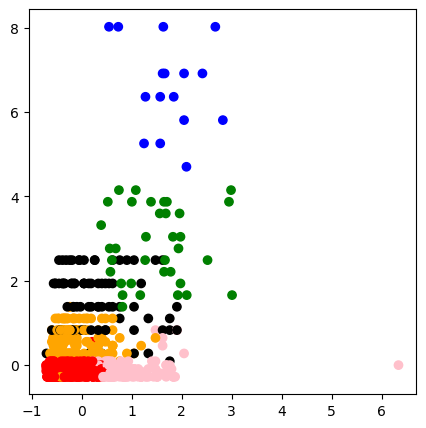

In [47]:
# Visualize clusters created by model
plt.figure(figsize=(5,5))
color_schema = np.array(["red", "green", "black", "orange", "blue", "pink"])
plt.scatter(data_processed.Credit_per_Card, data_processed.Digital_Engagement_Ratio, color=color_schema[model.labels_])

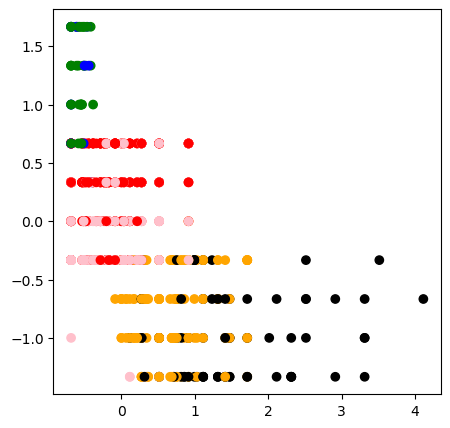

In [48]:
plt.figure(figsize=(5,5))
color_schema = np.array(["red", "green", "black", "orange", "blue", "pink"])
plt.scatter(data_processed.Call_to_Visit_Ratio, data_processed.Total_Credit_Cards, color=color_schema[model.labels_])

# Evaluate the Model

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(x, model.labels_)

0.3396603069511748

## Hyperparameter Tuning

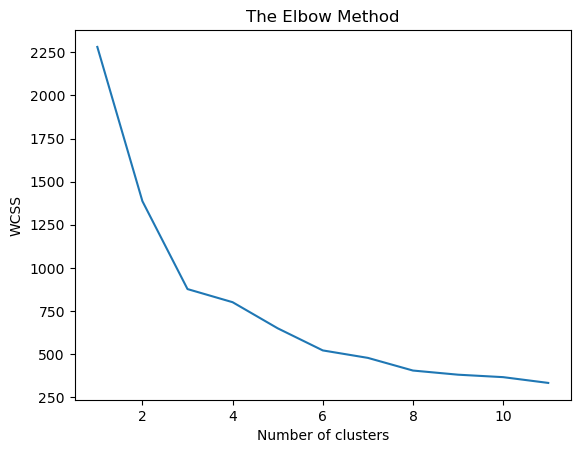

In [50]:
# Elbow Method
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,random_state=20)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Initialise the model with K as 3
model = KMeans(n_clusters=3, random_state=20)
model.fit(x)

KMeans(n_clusters=3, random_state=20)

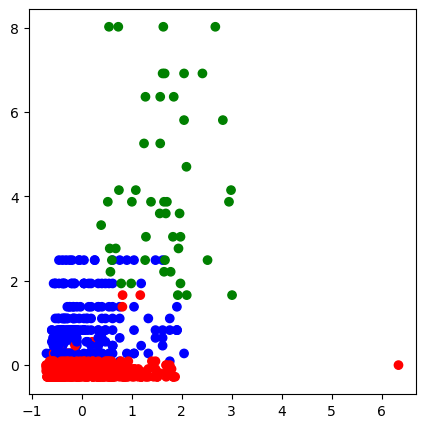

In [52]:
plt.figure(figsize=(5,5))
color_schema = np.array(["red", "green", "blue"])
plt.scatter(data_processed.Credit_per_Card, data_processed.Digital_Engagement_Ratio, color=color_schema[model.labels_])

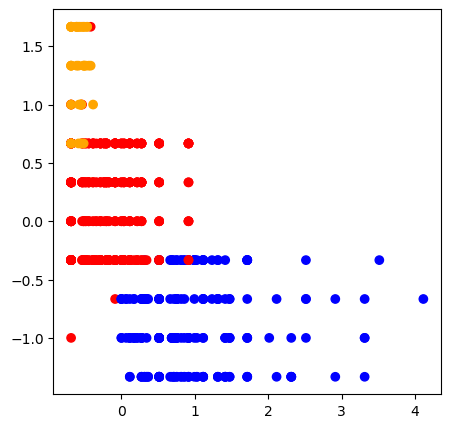

In [53]:
plt.figure(figsize=(5,5))
color_schema = np.array(["red", "orange", "blue"])
plt.scatter(data_processed.Call_to_Visit_Ratio, data_processed.Total_Credit_Cards, color=color_schema[model.labels_])

In [54]:
silhouette_score(x, model.labels_)

0.431630551970516